## Problem Summary and Data Info:

client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

Variable	Definition
id	Unique ID for the customer
Gender	Gender of the customer
Age
Age of the customer
Driving_License	0 : Customer does not have DL, 1 : Customer already has DL
Region_Code	Unique code for the region of the customer
Previously_Insured	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
Vehicle_Age	Age of the Vehicle 
Vehicle_Damage
1 : Customer got his/her vehicle damaged in the past.
0 : Customer didn't get his/her vehicle damaged in the past.
Annual_Premium	The amount customer needs to pay as premium in the year
Policy_Sales_Channel	Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
Vintage	Number of Days, Customer has been associated with the company
Response	1 :  Customer is interested, 0 : Customer is not interested

# Import important libraries:

In [1]:
#####---------------- Importing important Linraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, date

from zipfile import ZipFile

########=------------- Preprocessing Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


#######-----------Classificatoin----Modeling-----
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

from sklearn.ensemble import VotingClassifier

#######-----------------Evaluation-----------------
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix


In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows' , 150)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
sub = pd.read_csv('sample_submission_iA3afxn.csv')
sub.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [5]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
train.describe(include = 'all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [9]:
test.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037,127037.000000,127037.000000,127037.000000,127037.000000,127037,127037,127037.000000,127037.000000,127037.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN
freq,NaN,68236,NaN,NaN,NaN,NaN,66699,63835,NaN,NaN,NaN
mean,444628.000000,NaN,38.765903,0.998134,26.459866,0.460039,NaN,NaN,30524.643576,111.800468,154.318301
std,36672.567411,NaN,15.465814,0.043152,13.209916,0.498403,NaN,NaN,16945.297103,54.371765,83.661588
min,381110.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000
25%,412869.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24325.000000,26.000000,82.000000
50%,444628.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31642.000000,135.000000,154.000000
75%,476387.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39408.000000,152.000000,227.000000


In [10]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [11]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [12]:
test.nunique()

id                      127037
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           36327
Policy_Sales_Channel       145
Vintage                    290
dtype: int64

In [13]:
Train = train.copy()
Test = test.copy()

In [14]:
## Removing the id column:
Train.drop('id',axis =1, inplace = True)
Test.drop('id',axis =1, inplace = True)

In [15]:
Train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [16]:
col_val = ['Gender', 'Driving_License', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']

In [17]:
for i,col in enumerate(col_val):
    print(Train[col].value_counts(),'\n\n')

Male      206089
Female    175020
Name: Gender, dtype: int64 


1    380297
0       812
Name: Driving_License, dtype: int64 


0    206481
1    174628
Name: Previously_Insured, dtype: int64 


1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64 


Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64 


2630.0     64877
69856.0      140
39008.0       41
38287.0       38
45179.0       38
           ...  
62326.0        1
59733.0        1
55934.0        1
75387.0        1
53346.0        1
Name: Annual_Premium, Length: 48838, dtype: int64 


152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64 


256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64 

<AxesSubplot:>

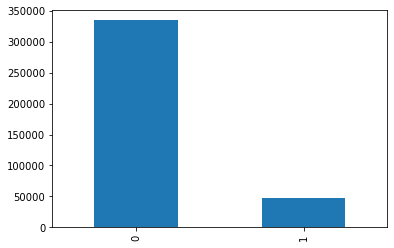

In [18]:
## We see data is imbalanced 
Train['Response'].value_counts().plot.bar()

In [19]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [20]:
Cat_feat = ['Gender', 'Age','Vehicle_Age', 'Vehicle_Damage']

In [21]:
# Lets make Categories of different features one by one:
Train = pd.get_dummies(Train,columns = ['Gender','Vehicle_Damage','Vehicle_Age'],drop_first = True)
Test = pd.get_dummies(Test,columns = ['Gender','Vehicle_Damage','Vehicle_Age'],drop_first = True)

In [22]:
Train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,44,1,28.0,0,40454.0,26.0,217,1,1,1,0,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,1,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,0,1,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,0,1,0


In [23]:
Train['Age'].value_counts()
# 20-30 is group 1
# 31-40 is group 2
# 41-50 is group 3
# 51-60 is group 4
# 61-70 is group 5
# 71-80 is group 6

24    25960
23    24256
22    20964
25    20636
21    16457
26    13535
27    10760
28     8974
43     8437
44     8357
45     8183
42     8007
46     7879
41     7736
29     7429
47     7351
40     7168
48     7113
49     6615
39     6460
50     6263
30     6258
20     6232
51     5915
38     5710
52     5590
31     5512
37     5408
53     5331
36     5066
33     5010
32     4998
54     4997
35     4936
34     4895
55     4495
56     4063
57     3944
58     3822
59     3614
60     3534
61     3341
62     3104
63     3084
64     2850
65     2791
66     2725
67     2624
69     2530
68     2440
70     2349
71     2051
72     2035
73     1925
74     1832
75     1605
76     1396
77     1388
78     1216
79      915
80      909
81       56
82       29
83       22
84       11
85       11
Name: Age, dtype: int64

In [24]:
Train.isnull().sum()

Age                      0
Driving_License          0
Region_Code              0
Previously_Insured       0
Annual_Premium           0
Policy_Sales_Channel     0
Vintage                  0
Response                 0
Gender_Male              0
Vehicle_Damage_Yes       0
Vehicle_Age_< 1 Year     0
Vehicle_Age_> 2 Years    0
dtype: int64

In [25]:
Test.isnull().sum()

Age                      0
Driving_License          0
Region_Code              0
Previously_Insured       0
Annual_Premium           0
Policy_Sales_Channel     0
Vintage                  0
Gender_Male              0
Vehicle_Damage_Yes       0
Vehicle_Age_< 1 Year     0
Vehicle_Age_> 2 Years    0
dtype: int64

## Modeling Primary

In [26]:
Y = Train['Response']
X = Train.drop('Response',axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state = 101,stratify = Y)

In [27]:
# lets check both with scaled data and non scaled data
SC = StandardScaler()
xl_train,xl_test = x_train.copy(),x_test.copy()
xl_train = pd.DataFrame(SC.fit_transform(xl_train),columns =x_train.columns) 
xl_test = pd.DataFrame(SC.transform(xl_test),columns = x_test.columns)


In [28]:
x_train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
108133,23,1,8.0,1,27804.0,160.0,260,1,0,1,0
248143,50,1,8.0,1,39441.0,26.0,44,1,0,0,0
35625,34,1,47.0,1,28029.0,152.0,69,1,0,1,0
373423,23,1,41.0,0,43692.0,152.0,19,1,0,1,0
367375,23,1,27.0,0,2630.0,152.0,274,0,1,1,0


In [29]:
xl_train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,-1.019905,0.04636,-1.387587,1.088194,-0.161181,0.884383,1.262225,0.922456,-1.010145,1.146073,-0.210438
1,0.720576,0.04636,-1.387587,1.088194,0.510415,-1.589631,-1.318830,0.922456,-1.010145,-0.872544,-0.210438
2,-0.310820,0.04636,1.559287,1.088194,-0.148196,0.736681,-1.020097,0.922456,-1.010145,1.146073,-0.210438
3,-1.019905,0.04636,1.105922,-0.918954,0.755749,0.736681,-1.617564,0.922456,-1.010145,1.146073,-0.210438
4,-1.019905,0.04636,0.048070,-0.918954,-1.614025,0.736681,1.429516,-1.084062,0.989957,1.146073,-0.210438


In [30]:
## Logistic Regression without standard scaler:
logm = LogisticRegression()
print(cross_val_score(estimator = LogisticRegression(),X= x_train,y= y_train,scoring = 'f1_weighted',n_jobs =-1, cv =5))

# [0.82014503 0.8201496  0.82190034 0.82190976 0.82300838]

[0.82014503 0.8201496  0.82190034 0.82190976 0.82300838]


In [31]:
## Logistic Regression without standard scaler:
logm = LogisticRegression()
print(cross_val_score(estimator = LogisticRegression(),X= xl_train,y= y_train,scoring = 'f1_weighted',n_jobs =-1, cv =5))

# [0.82017023 0.82013218 0.82024354 0.82016702 0.82010712]

[0.82017023 0.82013218 0.82024354 0.82016702 0.82010712]


In [32]:
# Decsion_Tree
print(cross_val_score(estimator = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5,
                     random_state=101), X = x_train, y = y_train, scoring = 'f1_weighted',n_jobs = -1, cv =5))

# [0.82014503 0.82015831 0.82015831 0.82016702 0.82014196]

[0.82014503 0.82015831 0.82015831 0.82016702 0.82014196]


In [33]:
# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators =20, max_depth = 5, min_samples_split = 4,
                                                        random_state =101)
print(cross_val_score(estimator = RandomForestClassifier(n_estimators =20, max_depth = 5, min_samples_split = 4,
                                                        random_state =101),X =x_train, y = y_train, n_jobs =-1, cv= 5,
                     scoring = 'f1_weighted'))

# [0.82014503 0.82016702 0.82016702 0.82016702 0.82014196]

[0.82014503 0.82016702 0.82016702 0.82016702 0.82014196]


In [34]:
# SVC 
#print(cross_val_score(estimator =SVC(),X =x_train, y= y_train, cv = 5, scoring = 'f1_weighted',n_jobs = -1))
# [0.82014503 0.82016702 0.82016702 0.82016702 0.82014196]

In [35]:
# SVC with standard scaler
#print(cross_val_score(estimator =SVC(),X =xl_train, y= y_train, cv = 5, scoring = 'f1_weighted',n_jobs = -1))

In [36]:
#SVC with imbalance check
svc_est = SVC(kernel ='linear', class_weight ='balanced',probability = True, verbose =1, random_state =101)

In [37]:
# svc_est.fit(x_train,y_train)
# ysvc_pred = svc_est.predict(x_test)

In [38]:
# print(confusion_matrix(y_test,ysvc_pred), classification_report(y_test,ysvc_pred))

In [39]:
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred), classification_report(y_test,rfc_pred))

[[83600     0]
 [11678     0]]               precision    recall  f1-score   support

           0       0.88      1.00      0.93     83600
           1       0.00      0.00      0.00     11678

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Upscaling the data

In [57]:
## As we clearly see there is bias ness in dataset and it does not classify the other calss at all
# First we will use 70 % data to upscale and then we will split it in train and val
N_train = Train.loc[0:260000,:]
# Rest 30% will be not be having upscaled data and we will test on this
N_Test = Train.loc[260001::,:] 

In [58]:
N_train.Response.value_counts()

0    228040
1     31961
Name: Response, dtype: int64

In [88]:
from sklearn.utils import resample
# Lets upscale the data
N_train_major = N_train[N_train.Response == 0]
N_train_minor = N_train[N_train.Response == 1]

Train_minor_upscale = resample(N_train_minor, replace = True, 
                               n_samples= 248040,random_state = 101)


In [89]:
# concant the upscaled data and create train test split: Upscalsed Train data
US_Train = pd.concat([N_train_major,Train_minor_upscale])
US_Train.Response.value_counts()

1    248040
0    228040
Name: Response, dtype: int64

In [90]:
NY = US_Train['Response']
NX = US_Train.drop('Response',axis=1)

ux_train, ux_test, uy_train, uy_test = train_test_split(NX,NY,random_state = 101,stratify = NY)


In [91]:
# lets check both with scaled data and non scaled data
SC = StandardScaler()
uxl_train,uxl_test = ux_train.copy(),ux_test.copy()
uxl_train = pd.DataFrame(SC.fit_transform(uxl_train),columns =ux_train.columns) 
uxl_test = pd.DataFrame(SC.transform(uxl_test),columns = ux_test.columns)


In [92]:
## Logistic Regression without standard scaler:
logm = LogisticRegression()
print(cross_val_score(estimator = LogisticRegression(),X= uxl_train,y= uy_train,scoring = 'f1_weighted',n_jobs =-1, cv =5))


[0.77846146 0.78200089 0.78108277 0.78164346 0.78050402]


In [93]:
logm.fit(uxl_train,uy_train)
log_pred = rfc.predict(uxl_test)
print(confusion_matrix(uy_test,log_pred), classification_report(uy_test,log_pred))

[[56678   332]
 [61991    19]]               precision    recall  f1-score   support

           0       0.48      0.99      0.65     57010
           1       0.05      0.00      0.00     62010

    accuracy                           0.48    119020
   macro avg       0.27      0.50      0.32    119020
weighted avg       0.26      0.48      0.31    119020



In [105]:
## Just Wow we see a good accuracy here:
rfc = RandomForestClassifier(n_estimators =300, max_depth = 8, min_samples_split = 20,
                                                        random_state =101)
rfc.fit(ux_train,uy_train)
rfc_pred = rfc.predict(ux_test)
print(confusion_matrix(uy_test,rfc_pred), classification_report(uy_test,rfc_pred))

[[37187 19823]
 [ 3000 59010]]               precision    recall  f1-score   support

           0       0.93      0.65      0.77     57010
           1       0.75      0.95      0.84     62010

    accuracy                           0.81    119020
   macro avg       0.84      0.80      0.80    119020
weighted avg       0.83      0.81      0.80    119020



In [95]:
## Lets test it on the test data which doesn't have any upscaled data
N_Test.Response.value_counts()

0    106359
1     14749
Name: Response, dtype: int64

In [106]:
NY_Test = N_Test['Response']
NX_Test = N_Test.drop('Response',axis = 1)
ntrfc_pred = rfc.predict(NX_Test)
print(confusion_matrix(NY_Test,ntrfc_pred), classification_report(NY_Test,ntrfc_pred))

[[68734 37625]
 [  791 13958]]               precision    recall  f1-score   support

           0       0.99      0.65      0.78    106359
           1       0.27      0.95      0.42     14749

    accuracy                           0.68    121108
   macro avg       0.63      0.80      0.60    121108
weighted avg       0.90      0.68      0.74    121108



In [97]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    127037 non-null  int64  
 1   Driving_License        127037 non-null  int64  
 2   Region_Code            127037 non-null  float64
 3   Previously_Insured     127037 non-null  int64  
 4   Annual_Premium         127037 non-null  float64
 5   Policy_Sales_Channel   127037 non-null  float64
 6   Vintage                127037 non-null  int64  
 7   Gender_Male            127037 non-null  uint8  
 8   Vehicle_Damage_Yes     127037 non-null  uint8  
 9   Vehicle_Age_< 1 Year   127037 non-null  uint8  
 10  Vehicle_Age_> 2 Years  127037 non-null  uint8  
dtypes: float64(3), int64(4), uint8(4)
memory usage: 7.3 MB


In [107]:
# Final Pred
final_pred = rfc.predict(Test)

In [108]:
sub.head()

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0


In [109]:
sub['Response'] = final_pred
sub.head()

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0


In [110]:
sub.to_csv("submission_rfc_upscale.csv", index=False)


In [102]:
Train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [104]:
## Lets try on full Dataset:
NF_Train = Train.copy()
# Lets upscale the data
NF_Train_major = NF_Train[NF_Train.Response == 0]
NF_Train_minor = NF_Train[NF_Train.Response == 1]

NF_Train_minor_upscale = resample(NF_Train_minor, replace = True, 
                               n_samples= 339999,random_state = 101)
# concant the upscaled data and create train test split: Upscalsed Train data
Full_Train = pd.concat([NF_Train_major,NF_Train_minor_upscale])
Full_Train.Response.value_counts()

1    339999
0    334399
Name: Response, dtype: int64

In [111]:
FF_Y = Full_Train['Response']
FF_X = Full_Train.drop('Response',axis=1)

fx_train, fx_test, fy_train, fy_test = train_test_split(FF_X,FF_Y,random_state = 101,stratify = FF_Y)


In [112]:
## Just Wow we see a good accuracy here:
Frfc = RandomForestClassifier(n_estimators =300, max_depth = 8, min_samples_split = 20,
                                                        random_state =101)
Frfc.fit(fx_train,fy_train)
Frfc_pred = rfc.predict(fx_test)
print(confusion_matrix(fy_test,Frfc_pred), classification_report(fy_test,Frfc_pred))

[[54161 29439]
 [ 4194 80806]]               precision    recall  f1-score   support

           0       0.93      0.65      0.76     83600
           1       0.73      0.95      0.83     85000

    accuracy                           0.80    168600
   macro avg       0.83      0.80      0.80    168600
weighted avg       0.83      0.80      0.80    168600



In [113]:
# Final Pred
final_pred = Frfc.predict(Test)
sub['Response'] = final_pred
sub.head()

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0


In [114]:
sub.to_csv("submission_Full_rfc_upscale.csv", index=False)


In [115]:
## Lets use GB Classifiers:
## LGB Classifier:


In [116]:
dxl_train = lgb.Dataset(fx_train,label = fy_train)

params = {'learning_rate': 0.1, 'objective': 'binary', 'n_estimator': 30, 'max_depth': 6, 'boosting_type': 'gbdt',
         'n_jobs':-1, 'random_state': 101}

In [129]:
lgbm = lgb.train(params, dxl_train, num_boost_round = 40)
Y_lgb_pred = lgbm.predict(fx_test)

Y_lgb_pred

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Info] Number of positive: 254999, number of negative: 250799
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 505798, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504152 -> initscore=0.016608
[LightGBM] [Info] Start traini

array([0.27824181, 0.76775386, 0.67306929, ..., 0.75039706, 0.79063703,
       0.49458701])

In [130]:
for i in range(len(fx_test)):
    if Y_lgb_pred[i] >0.35:
        Y_lgb_pred[i]=1.0
    else:
        Y_lgb_pred[i] =0.0
Y_lgb_pred

array([0., 1., 1., ..., 1., 1., 1.])

In [131]:
Y_lgb_pred = pd.DataFrame(Y_lgb_pred, columns=['Response'])
print(confusion_matrix(fy_test,Y_lgb_pred), classification_report(fy_test,Y_lgb_pred))

[[50768 32832]
 [ 1908 83092]]               precision    recall  f1-score   support

           0       0.96      0.61      0.75     83600
           1       0.72      0.98      0.83     85000

    accuracy                           0.79    168600
   macro avg       0.84      0.79      0.79    168600
weighted avg       0.84      0.79      0.79    168600



In [137]:
# Final Pred
FY_lgb_pred = lgbm.predict(Test)
FY_lgb_pred

array([0.01123854, 0.76088011, 0.75748567, ..., 0.01123854, 0.01088976,
       0.01497409])

In [138]:
for i in range(len(Test)):
    if FY_lgb_pred[i] >0.5:
        FY_lgb_pred[i]=1.0
    else:
        FY_lgb_pred[i] =0.0
FY_lgb_pred

array([0., 1., 1., ..., 0., 0., 0.])

In [139]:
sub['Response'] = FY_lgb_pred
sub.head()
sub.to_csv("submission_Full_lgb_upscale.csv", index=False)
